# Sales Prediction for Big Mart Outlets

<img src='bigmart.jpg' style="width:800px;height:500px" />

Competition Link:  https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement

# GROUP         
- **Palak Dhingra (18csu151)**
- **Pranav Goel (18csu158)**

## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.


Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

## Data Description

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.



<b>Trainind Data</b>

<img src='Data.png' style="width:900px;height:500px" />

<b>Test Data</b>

<img src='TestData.png' style="width:900px;height:500px" />

## Steps involved in project

<b>1 Importing Liabraries and Dataset</b>

<b>2 Getting to know the data</b>

<b>3 EDA / Data Visualization</b>

<b>4 Classification</b>
 
    4.1 Logistic Regression
    
    4.2 KNN
    
    4.3 Decision Tree
       
    4.4 XG Boosting
    
    4.5 Comparision of Classification Model
    

<b>5 Regression</b>

    5.1 Linear Regression
    
    5.2 Ridge
     
    5.3 LAsso
    
    5.4 ADABoost
    
    5.5 Gradient Boost
    
    5.6 Comparision
    
    5.7 Hyper Parameter Tuning : GridSearch
    
<b>6. Prediction on Test Data</b>

   6.1 Applying model on complete training data
   
   6.2 Preparing test data
   
   6.3 Label encoding for test data
   
   6.4 Prediction for Test Data

# Main Project

# 1. Importing Libraries and Dataset

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#prepairing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

#performance
from sklearn.metrics import confusion_matrix
from sklearn import metrics


#label encoding
from sklearn.preprocessing import LabelEncoder

#librariesfor regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#performance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [223]:
train_data = pd.read_csv('train_v9rqX0R.csv')


In [311]:
test_data = pd.read_csv('test_AbJTz2l (1).csv')

# 2. Getting To Know The Data

### Displaying Dataset

In [224]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [225]:
train_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [226]:
train_data.shape

(8523, 12)

In [227]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [228]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [229]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Checking for unique values in each column

In [230]:
train_data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Checking for null values

In [231]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

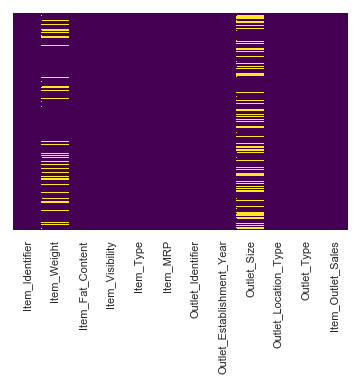

In [232]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

> ### **This shows that there are null values in our dataset**

### Handling missing values

In [233]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
train_data['Outlet_Size'].fillna((train_data['Outlet_Size'].mode()[0]), inplace=True)

In [234]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

> ### **This shows there are no null value in our dataset**

# 3. EDA / Data Visualization

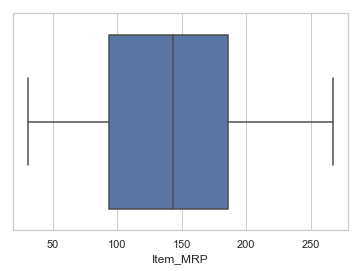

In [235]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=train_data["Item_MRP"])
plt.show()

>### **The median (middle quartile) marks the mid-point of the Item MRP (around 143) and is shown by the line that divides the box into two parts.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2F3AEE470>,
      dtype=object)

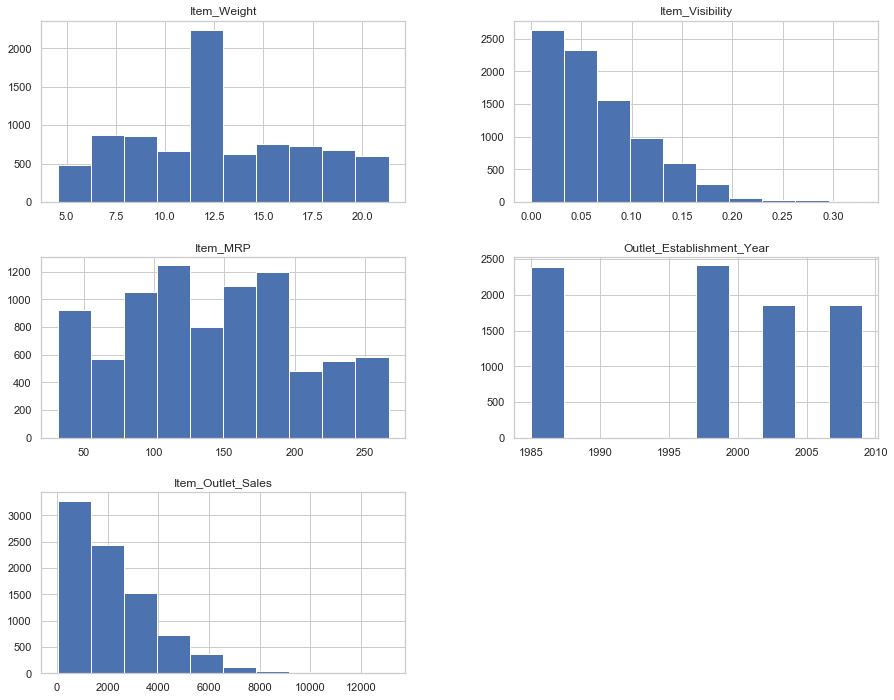

In [236]:
train_data.hist(figsize=(15,12))

> ### **It shows the distribution of various attributes in the dataset**

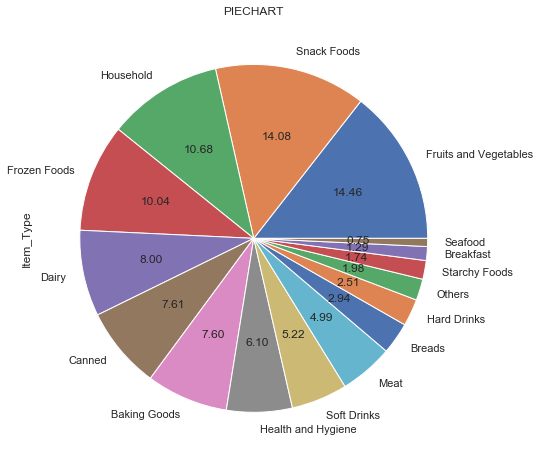

In [237]:
train_data['Item_Type'].value_counts().plot.pie(figsize=(8, 8), autopct='%.2f')
plt.title("PIECHART");

> ### **This shows the distribution of Item Type in percentage**

In [238]:
# Correlation between target and feature variables
corr_matrix = train_data.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.011550
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

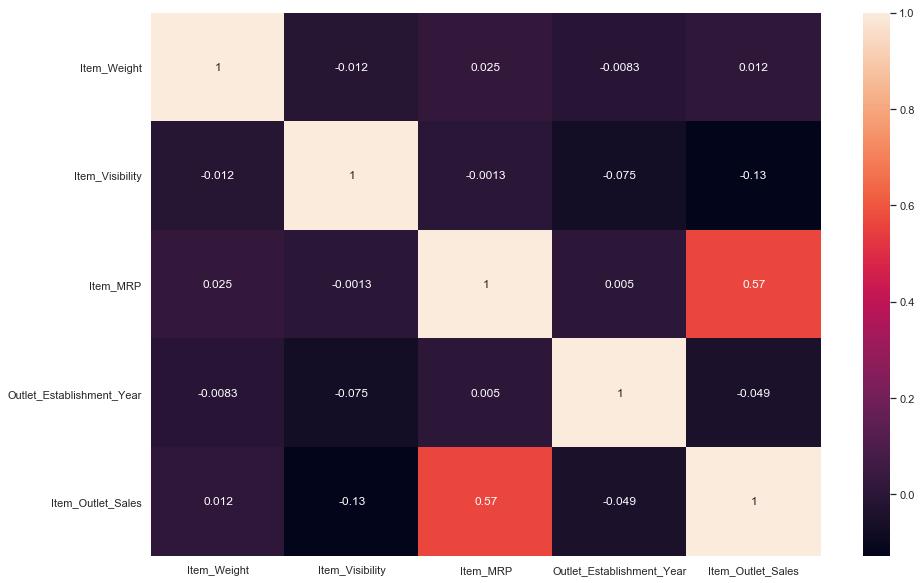

In [239]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True)

> ### **Attributes having highest correlation(0.57) are item_MRP and item_outlet_sales**

In [240]:
train_data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [241]:
train_data.Item_Fat_Content = train_data.Item_Fat_Content.replace('LF', 'Low Fat')
train_data.Item_Fat_Content = train_data.Item_Fat_Content.replace('low fat', 'Low Fat')
train_data.Item_Fat_Content = train_data.Item_Fat_Content.replace('reg','Regular')

train_data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

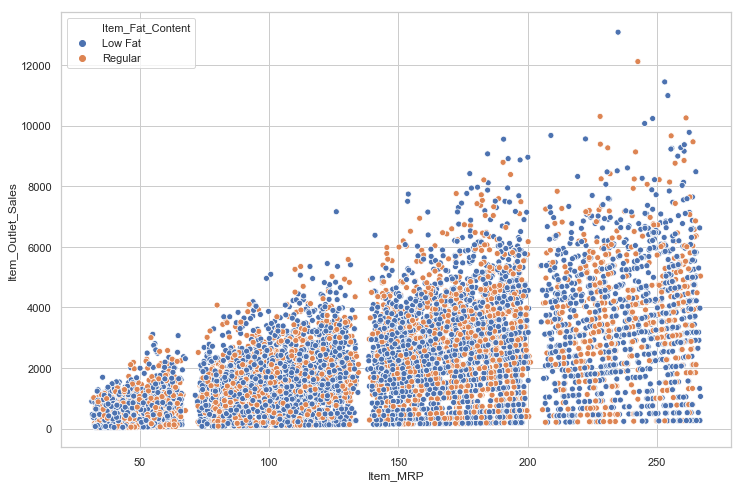

In [242]:
# Correlation strength of column Item_MRP with column Item_Outlet_Sales is very high
# Exploit Item_MRP column for further information about target column

fig, axes = plt.subplots(1, 1, figsize=(12,8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales',hue='Item_Fat_Content' ,data=train_data)

> ### **This shows the scatter plot between item_MRP and item_outlet_sales on the basis of item fat content**

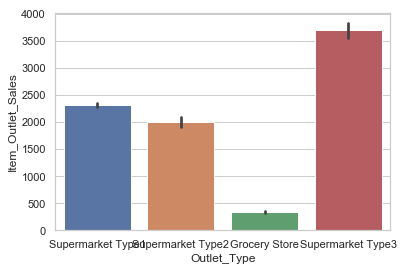

In [243]:
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data)

>### **This shows us the outlet sales on the basis of outlet type**

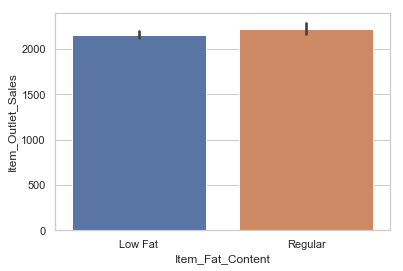

In [244]:
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_data)

>### **This shows us the outlet sales according to fat content**

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

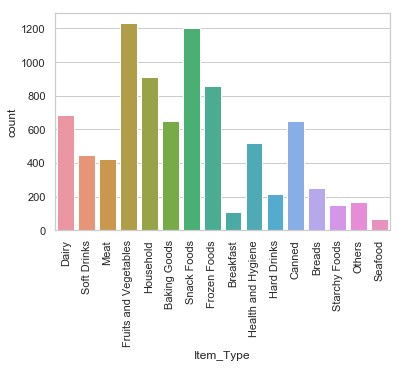

In [245]:
l = list(train_data['Item_Type'].unique())
chart = sns.countplot(train_data["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

>### **This shows us the count of item types from this we can see that there is maximum number of fruits and vegetables**

In [246]:
Regular = train_data[train_data['Item_Fat_Content']=='Regular']
Low= train_data[train_data['Item_Fat_Content']=='Low Fat']

In [247]:
print("Total =", len(train_data))

print("Number of Regular Fat content products=", len(Regular))
print("Percentage of Regular Fat =", 1.*len(Regular)/len(train_data)*100.0, "%")
 
print("Number of  Low Fat content products =", len(Low))
print("Percentage of Low Fat =", 1.*len(Low)/len(train_data)*100.0, "%")

Total = 8523
Number of Regular Fat content products= 3006
Percentage of Regular Fat = 35.26927138331573 %
Number of  Low Fat content products = 5517
Percentage of Low Fat = 64.73072861668426 %


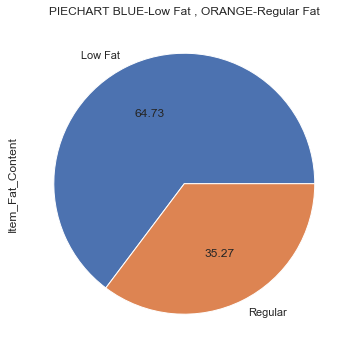

In [248]:
train_data['Item_Fat_Content'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("PIECHART BLUE-Low Fat , ORANGE-Regular Fat");

>### **This shows the percentage of item_fat_content**

# 4. CLASSIFICATION

> ### **classification refers to a predictive modeling problem where a class label is predicted for a given example of input data**

##  Selecting Columns and Splitting data

In [249]:
X = train_data.iloc[:, [1,5]].values #weight and MRP
y = train_data.iloc[:, 2].values #Fatcontent

In [250]:
X

array([[  9.3   , 249.8092],
       [  5.92  ,  48.2692],
       [ 17.5   , 141.618 ],
       ...,
       [ 10.6   ,  85.1224],
       [  7.21  , 103.1332],
       [ 14.8   ,  75.467 ]])

In [251]:
y

array(['Low Fat', 'Regular', 'Low Fat', ..., 'Low Fat', 'Regular',
       'Low Fat'], dtype=object)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [253]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4.1 Logistic Regression

> ### **Logistic Regression is a supervised Learning classification algorithm used to predict the probability of a target variable**


In [254]:
 #Fitting Logistic Regression to the Training set

classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [255]:
y_pred_training_1 = classifier1.predict(X_train)
y_pred_training_1

array(['Low Fat', 'Low Fat', 'Low Fat', ..., 'Low Fat', 'Low Fat',
       'Low Fat'], dtype=object)

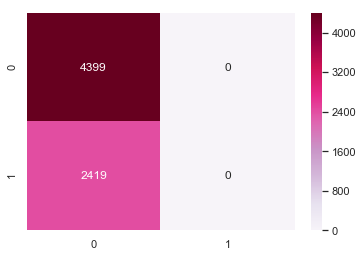

In [256]:
cm = confusion_matrix(y_train, y_pred_training_1)
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")

In [257]:
y_pred_test_1 = classifier1.predict(X_test)
y_pred_test_1

array(['Low Fat', 'Low Fat', 'Low Fat', ..., 'Low Fat', 'Low Fat',
       'Low Fat'], dtype=object)

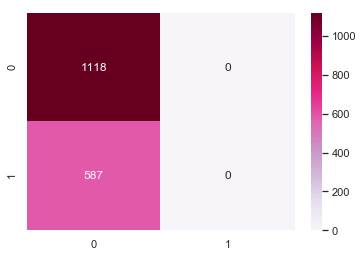

In [258]:
cm = confusion_matrix(y_test, y_pred_test_1)
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")

In [259]:
acc1=metrics.accuracy_score(y_test, y_pred_test_1)
print("Accuracy is :",acc1)

Accuracy is : 0.6557184750733138


# 4.2 KNN

> ### **K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem. KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). Classification is done by a majority vote to its neighbors.**


In [260]:
classifier3 = KNeighborsClassifier(n_neighbors=5)
classifier3.fit(X_train, y_train)

KNeighborsClassifier()

In [261]:
y_pred_training_3 = classifier3.predict(X_train)
y_pred_training_3

array(['Low Fat', 'Low Fat', 'Regular', ..., 'Regular', 'Low Fat',
       'Low Fat'], dtype=object)

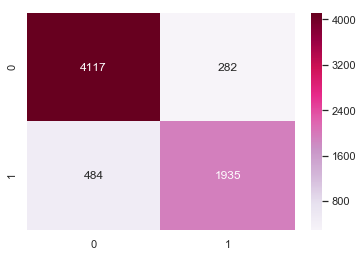

In [262]:
cm = confusion_matrix(y_train, y_pred_training_3)
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")

In [263]:
y_pred_test_3 = classifier3.predict(X_test)
y_pred_test_3

array(['Regular', 'Regular', 'Low Fat', ..., 'Low Fat', 'Low Fat',
       'Low Fat'], dtype=object)

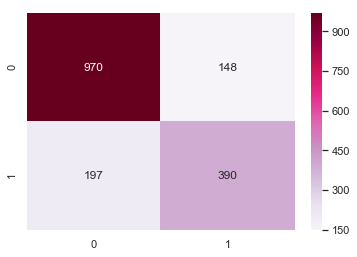

In [264]:
cm = confusion_matrix(y_test, y_pred_test_3)
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")

In [265]:
acc2=metrics.accuracy_score(y_test, y_pred_test_3)
print("Accuracy is :",acc2)

Accuracy is : 0.7976539589442815


# 4.3 Decision Tree

 > ### **A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.**

In [266]:
classifier5 = DecisionTreeClassifier(criterion = 'entropy')
classifier5.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [267]:
y_pred_training_5 = classifier5.predict(X_train)
y_pred_training_5

array(['Low Fat', 'Low Fat', 'Regular', ..., 'Regular', 'Low Fat',
       'Low Fat'], dtype=object)

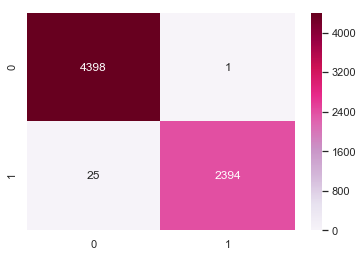

In [268]:
cm = confusion_matrix(y_train, y_pred_training_5)
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")

In [269]:
y_pred_test_5 = classifier5.predict(X_test)
y_pred_test_5

array(['Low Fat', 'Low Fat', 'Low Fat', ..., 'Low Fat', 'Regular',
       'Low Fat'], dtype=object)

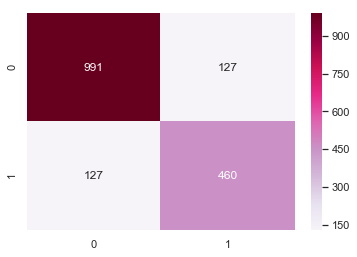

In [270]:
cm = confusion_matrix(y_test, y_pred_test_5)
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")

In [271]:
acc3=metrics.accuracy_score(y_test, y_pred_test_5)
print("Accuracy is :",acc3)

Accuracy is : 0.8510263929618769


# 4.4 XGBOOST 

> ### **The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model**

In [272]:
xgb_classifier = xgb.XGBClassifier(max_depth=10)

In [273]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [274]:
predictions = xgb_classifier.predict(X_test)

In [275]:
acc4=metrics.accuracy_score(y_test, predictions)
print("Accuracy is :",acc4)

Accuracy is : 0.86158357771261


# 4.5 Comparision of Classification Models

In [276]:
techniques = ['Logistic Regression','KNN','Decision Tree','XGBoost']

score_df = pd.DataFrame({'model': [acc1,acc2,acc3,acc4]}, index=techniques)

score_df['model'] = score_df.applymap(lambda x: x)
score_df.model.sort_values()

Logistic Regression    0.655718
KNN                    0.797654
Decision Tree          0.851026
XGBoost                0.861584
Name: model, dtype: float64

# Label Encoding

In [277]:
le = LabelEncoder()
train_data['Outlet'] = le.fit_transform(train_data['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in cat_col:
    train_data[col] = le.fit_transform(train_data[col])

In [278]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,9
1,DRC01,5.920,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,3
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,9
3,FDX07,19.200,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,0
4,NCD19,8.930,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,OUT013,1987,0,2,1,2778.3834,1
8519,FDS36,8.380,1,0.046982,0,108.1570,OUT045,2002,1,1,1,549.2850,7
8520,NCJ29,10.600,0,0.035186,8,85.1224,OUT035,2004,2,1,1,1193.1136,6
8521,FDN46,7.210,1,0.145221,13,103.1332,OUT018,2009,1,2,2,1845.5976,3


# 5. Regression

> ### **Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables)**

In [279]:
X = train_data.iloc[:, [1,2,3,4,5,8,9,10,12]].values #Weight,Fat Content,Visibility,Type,MRP,Outlet_Size,Outlet_Location_Type,
                                                    # Outlet_Type,Outlet
y = train_data.iloc[:, 11].values # sales

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 5.1  LINEAR REGRESSION

> ### **Linear regression is a machine learning algorithm based on supervised learning that performs the task to predict dependent variable** 

In [283]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

pred_lr = linear_reg.predict(X_test)


In [284]:
mse = mean_squared_error(y_test, pred_lr)
lr_score = np.sqrt(mse)
lr_score

1212.639527704472

In [285]:
# Cross validation for linear regression

score = cross_val_score(linear_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lr_score_cross = np.sqrt(-score)

np.mean(lr_score_cross)

1189.4787444588237

# 5.2 RIDGE

> ### **Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).**

In [286]:
r = Ridge(alpha=0.05, solver='cholesky')
r.fit(X_train, y_train)

pred_r = r.predict(X_test)
mse = mean_squared_error(y_test, pred_r)
r_score = np.sqrt(mse)
r_score

1212.6398266447918

In [287]:
# Cross validation Ridge
r = Ridge(alpha=0.05, solver='cholesky')
score = cross_val_score(r, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
r_score_cross = np.sqrt(-score)
np.mean(r_score_cross)

1189.4787108752155

# 5.3 LASSO

> ### **Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).**

In [288]:
l = Lasso(alpha=0.05)
l.fit(X_train, y_train)

pred_l = l.predict(X_test)
mse = mean_squared_error(y_test, pred_l)
l_score = np.sqrt(mse)
l_score

1212.6382057567205

In [289]:
# Cross validation Lasso

l = Lasso(alpha=0.05)
score = cross_val_score(l, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
l_score_cross = np.sqrt(-score)
np.mean(l_score_cross)

1189.5993368363718

# 5.4 ADA BOOSTING

> ### **An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction.**

In [290]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)


AdaBoostRegressor()

In [291]:
pred_ada = ada.predict(X_test)
ada_score = mean_squared_error(y_test, pred_ada)
ada_score = np.sqrt(ada_score)
ada_score

1265.006431624774

In [292]:
# Cross validation AdaBoostRegression

ada = AdaBoostRegressor()
score = cross_val_score(ada, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ada_score_cross = np.sqrt(-score)
np.mean(ada_score_cross)

1225.6512670563382

# 5.5 GRADIENT BOOSTING

> ### **Gradient boosting is a machine learning technique for regression  which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.**

In [293]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
pred_gbr = gbr.predict(X_test)
gb_score = mean_squared_error(y_test, pred_gbr)
gb_score = np.sqrt(gb_score)
gb_score

1104.8880976846276

In [294]:
# Cross validation Gradient Boosting

gb = GradientBoostingRegressor()
score = cross_val_score(gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
gb_score_cross = np.sqrt(-score)
np.mean(gb_score_cross)

1082.7564309669265

# 5.6 Comparision

In [295]:
techniques = ['Linear Regression','Linear Regression CV','Ridge Regression','Ridge Regression CV','Lasso Regression',
     'Lasso Regression CV','Ada Boost','Ada Boost CV','Gradient Boost','Gradient Boost CV']

score_df = pd.DataFrame({'model': [lr_score,lr_score_cross,r_score,r_score_cross,l_score,l_score_cross,ada_score,ada_score_cross,  
                                   gb_score,gb_score_cross]}, index=techniques)

score_df['model'] = score_df.applymap(lambda x: x.mean())
score_df.model.sort_values()

Gradient Boost CV       1082.756431
Gradient Boost          1104.888098
Ridge Regression CV     1189.478711
Linear Regression CV    1189.478744
Lasso Regression CV     1189.599337
Lasso Regression        1212.638206
Linear Regression       1212.639528
Ridge Regression        1212.639827
Ada Boost CV            1225.651267
Ada Boost               1265.006432
Name: model, dtype: float64

# 5.7 Hyper Parameter Tuning: Grid Search

In [296]:
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingRegressor(max_depth=7, n_estimators=200, learning_rate=0.01)

param = [{'min_samples_split':[5,9,13], 'max_leaf_nodes':[3,5,7,9], 'max_features':[1,3,5,7,9]}]

gs = GridSearchCV(gb, param, cv=5, scoring='neg_mean_squared_error')
gs.fit(X,y)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=7,
                                                 n_estimators=200),
             param_grid=[{'max_features': [1, 3, 5, 7, 9],
                          'max_leaf_nodes': [3, 5, 7, 9],
                          'min_samples_split': [5, 9, 13]}],
             scoring='neg_mean_squared_error')

In [297]:
gs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features=9,
                          max_leaf_nodes=9, min_samples_split=5,
                          n_estimators=200)

In [298]:
gradient=gs.best_estimator_

# 6. PREDICTION ON TEST DATA

# 6.1 Applying model on complete training data

In [299]:
train_X = train_data.iloc[:, [1,2,3,4,5,8,9,10,12]].values
train_y = train_data.iloc[:, 11].values

In [300]:
gradient.fit(train_X, train_y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features=9,
                          max_leaf_nodes=9, min_samples_split=5,
                          n_estimators=200)

# 6.2 Preparing test data

In [312]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [313]:
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)
test_data['Outlet_Size'].fillna((test_data['Outlet_Size'].mode()[0]), inplace=True)

In [314]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# 6.3 Label encoding for test data

In [315]:
le = LabelEncoder()
test_data['Outlet'] = le.fit_transform(test_data['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in cat_col:
    test_data[col] = le.fit_transform(test_data[col])

In [316]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet
0,FDW58,20.750000,1,0.007565,13,107.8622,OUT049,1999,1,0,1,9
1,FDW14,8.300000,4,0.038428,4,87.3198,OUT017,2007,1,1,1,2
2,NCN55,14.600000,1,0.099575,11,241.7538,OUT010,1998,1,2,0,0
3,FDQ58,7.315000,1,0.015388,13,155.0340,OUT017,2007,1,1,1,2
4,FDY38,12.695633,2,0.118599,4,234.2300,OUT027,1985,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,2,0.013496,13,141.3154,OUT046,1997,2,0,1,8
5677,FDD47,7.600000,2,0.142991,15,169.1448,OUT018,2009,1,2,2,3
5678,NCO17,10.000000,1,0.073529,8,118.7440,OUT045,2002,1,1,1,7
5679,FDJ26,15.300000,2,0.000000,3,214.6218,OUT017,2007,1,1,1,2


# 6.4 Prediction for Test Data

In [317]:
test_X = test_data.iloc[:, [1,2,3,4,5,8,9,10,11]].values


In [318]:
test_y = gradient.predict(test_X)

In [319]:
test_y

array([1721.38253999, 1466.71664998,  729.96017205, ..., 1894.43573414,
       3341.36827954, 1412.84720243])

In [320]:
predict_df = pd.DataFrame({'Item_Outlet_Sales': test_y})
pred_values = pd.concat([test_data, predict_df], axis=1)
pred_values.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet,Item_Outlet_Sales
0,FDW58,20.750000,1,0.007565,13,107.8622,OUT049,1999,1,0,1,9,1721.382540
1,FDW14,8.300000,4,0.038428,4,87.3198,OUT017,2007,1,1,1,2,1466.716650
2,NCN55,14.600000,1,0.099575,11,241.7538,OUT010,1998,1,2,0,0,729.960172
3,FDQ58,7.315000,1,0.015388,13,155.0340,OUT017,2007,1,1,1,2,2424.229446
4,FDY38,12.695633,2,0.118599,4,234.2300,OUT027,1985,1,2,3,5,5487.017142


# Thank You